The dataset contains:
•	Fiscal Year: The fiscal year of the report
•	Month Ending: The month for which the report is prepared
•	Licensee: The casino operator. Or Name of the casino license holder
•	Wagers: The total amount wagered by patrons
•	Patron Winnings: The amount won by patrons.
•	Cancelled Wagers: The number of wagers cancelled.
•	Online Casino Gaming Win/(Loss): Net win or loss from online gaming
•	Promotional Coupons or Credits Wagered: The amount wagered using promotional credits.
•	Promotional Deduction: The deducted amount from promotions.
•	Total Gross Gaming Revenue: The final revenue after deductions.
•	Payment: Total payment to the license holder

In [7]:
!pip install wordcloud plotly

We will use some common libraries like pandas for data manipulation and matplotlib for visualization.

Data Preprocessing 

In [182]:
#Import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import plotly.express as px
from wordcloud import WordCloud

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6) #

In [97]:
#Apply an orange-thememed Seaborn style
sns.set_style("whitegrid") #white background with gridlines
sns.color_palette(palette='Oranges')
sns.set_context("notebook",font_scale = 1.2)

In [184]:
#Read in the data
#goto data and copy path
# Display the first few rows of the dataset
data = pd.read_csv('Casino_Gaming_Data new.csv')
data.head(10)

,Fiscal Year,Month Ending,Licensee,Wagers,Patron Winnings,Cancelled Wagers,Online Casino Gaming Win/(Loss),Promotional Coupons or Credits Wagered (3),Promotional Deduction (4),Total Gross Gaming Revenue,Payment (5)
0,2021/22,06/30/2022 12:00:00 AM,Mohegan Tribe On-Reservation,379023,335505,5,43513,6390,6390,37123,6682
1,2021/22,06/30/2022 12:00:00 AM,MPTN On-Reservation,671843,685886,3,-14046,29041,0,-14046,0
2,2021/22,06/30/2022 12:00:00 AM,"MPI Master Wagering License CT, LLC",420056291,406814933,164727,13076631,12372142,3269158,9807473,1765345
3,2021/22,06/30/2022 12:00:00 AM,"Mohegan Digital, LLC",254393582,246515856,11645,7866081,1397441,1397441,6468640,1164355
4,2021/22,05/31/2022 12:00:00 AM,Mohegan Tribe On-Reservation,716607,681306,0,35301,4130,4130,31171,5611
5,2021/22,05/31/2022 12:00:00 AM,MPTN On-Reservation,710829,684549,10,26270,22614,6568,19703,3546
6,2021/22,05/31/2022 12:00:00 AM,"MPI Master Wagering License CT, LLC",496904669,484267401,146970,12490298,29968316,3122574,9367723,1686190
7,2021/22,05/31/2022 12:00:00 AM,"Mohegan Digital, LLC",275818534,267451923,3887,8362724,1205520,1205520,7157204,1288297
8,2021/22,04/30/2022 12:00:00 AM,MPTN On-Reservation,1464737,1438677,0,26060,48032,6515,19545,3518
9,2021/22,04/30/2022 12:00:00 AM,"MPI Master Wagering License CT, LLC",475988357,462730802,210022,13047534,17431335,3261883,9785650,1761417


In [186]:
# Data types for our columns
data.dtypes

Fiscal Year                                   object
Month Ending                                  object
Licensee                                      object
Wagers                                         int64
Patron Winnings                                int64
Cancelled Wagers                               int64
Online Casino Gaming Win/(Loss)                int64
Promotional Coupons or Credits Wagered (3)     int64
Promotional Deduction (4)                      int64
Total Gross Gaming Revenue                     int64
Payment (5)                                    int64
dtype: object

In [63]:
data.shape
#The dataset contains 143 entries with 11 columns. Here's a summary:

(143, 11)

In [188]:
# Get a summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Fiscal Year                                 143 non-null    object
 1   Month Ending                                143 non-null    object
 2   Licensee                                    143 non-null    object
 3   Wagers                                      143 non-null    int64 
 4   Patron Winnings                             143 non-null    int64 
 5   Cancelled Wagers                            143 non-null    int64 
 6   Online Casino Gaming Win/(Loss)             143 non-null    int64 
 7   Promotional Coupons or Credits Wagered (3)  143 non-null    int64 
 8   Promotional Deduction (4)                   143 non-null    int64 
 9   Total Gross Gaming Revenue                  143 non-null    int64 
 10  Payment (5)               

As we can see from the above info that the our dataset has 11 columns and each columns has 143 values. There is no Null values in the dataset.

In [190]:
# Check for missing values
print(data.isnull().sum())

Fiscal Year                                   0
Month Ending                                  0
Licensee                                      0
Wagers                                        0
Patron Winnings                               0
Cancelled Wagers                              0
Online Casino Gaming Win/(Loss)               0
Promotional Coupons or Credits Wagered (3)    0
Promotional Deduction (4)                     0
Total Gross Gaming Revenue                    0
Payment (5)                                   0
dtype: int64


In [87]:
# Fill or drop missing values as needed
data = data.dropna() 

In [79]:
data.sort_values(by=['Total Gross Gaming Revenue'], inplace=False, ascending=False)

,Fiscal Year,Month Ending,Licensee,Wagers,Patron Winnings,Cancelled Wagers,Online Casino Gaming Win/(Loss),Promotional Coupons or Credits Wagered (3),Promotional Deduction (4),Total Gross Gaming Revenue,Payment (5)
101,2023/24,12/31/2023 12:00:00 AM,"MPI Master Wagering License CT, LLC",760237364,734978333,520377,24738654,1923080,1923080,22815574,4106803
129,2024/25,10/31/2024 12:00:00 AM,"MPI Master Wagering License CT, LLC",783884226,757317634,862159,25704433,5638382,3855665,21848768,3932778
93,2023/24,02/29/2024 12:00:00 AM,"MPI Master Wagering License CT, LLC",689790059,663415859,846510,25527691,3839598,3829154,21698537,3905737
81,2023/24,05/31/2024 12:00:00 AM,"MPI Master Wagering License CT, LLC",752954349,726763463,764875,25426010,4198571,3813902,21612109,3890180
125,2024/25,11/30/2024 12:00:00 AM,"MPI Master Wagering License CT, LLC",769608621,743861432,869519,24877670,4805065,3731650,21146019,3806283
...,...,...,...,...,...,...,...,...,...,...,...
31,2022/23,05/31/2023 12:00:00 AM,Mohegan Tribe On-Reservation,825564,831154,6,-5596,14413,0,-5596,0
95,2023/24,01/31/2024 12:00:00 AM,Mohegan Tribe On-Reservation,1080286,1089531,5,-9250,4061,0,-9250,0
1,2021/22,06/30/2022 12:00:00 AM,MPTN On-Reservation,671843,685886,3,-14046,29041,0,-14046,0
51,2022/23,12/31/2022 12:00:00 AM,Mohegan Tribe On-Reservation,1029050,1066231,85,-37265,8131,0,-37265,0


Exploratory Data Analysis (EDA) 

In [192]:
# Get descriptive statistics
# for generating descriptive statistics of a Series. 
data.describe() 

,Wagers,Patron Winnings,Cancelled Wagers,Online Casino Gaming Win/(Loss),Promotional Coupons or Credits Wagered (3),Promotional Deduction (4),Total Gross Gaming Revenue,Payment (5)
count,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02
mean,2.742207e+08,2.655218e+08,1.783408e+05,8.520509e+06,2.909760e+06,1.470359e+06,7.050150e+06,1.269229e+06
std,2.815530e+08,2.725166e+08,2.826004e+05,8.921912e+06,5.194974e+06,1.512958e+06,7.483596e+06,1.346855e+06
min,1.145280e+05,1.113650e+05,0.000000e+00,-8.099000e+04,0.000000e+00,0.000000e+00,-8.099000e+04,0.000000e+00
25%,1.407190e+06,1.357855e+06,5.000000e+00,3.713950e+04,1.118100e+04,6.188500e+03,3.172700e+04,5.711000e+03
50%,2.656540e+08,2.575127e+08,3.887000e+03,7.866081e+06,1.065100e+06,1.021521e+06,6.821088e+06,1.227796e+06
75%,5.352846e+08,5.156584e+08,2.913700e+05,1.587461e+07,3.844558e+06,3.071548e+06,1.304302e+07,2.347743e+06
max,7.838842e+08,7.573176e+08,1.133136e+06,2.570443e+07,3.220656e+07,4.163625e+06,2.281557e+07,4.106803e+06


In [194]:
#shows all statiscal value both numeric data and category
data.describe(include = 'all')

,Fiscal Year,Month Ending,Licensee,Wagers,Patron Winnings,Cancelled Wagers,Online Casino Gaming Win/(Loss),Promotional Coupons or Credits Wagered (3),Promotional Deduction (4),Total Gross Gaming Revenue,Payment (5)
count,143,143,143,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02
unique,4,38,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2022/23,06/30/2022 12:00:00 AM,"MPI Master Wagering License CT, LLC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,48,4,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.742207e+08,2.655218e+08,1.783408e+05,8.520509e+06,2.909760e+06,1.470359e+06,7.050150e+06,1.269229e+06
std,NaN,NaN,NaN,2.815530e+08,2.725166e+08,2.826004e+05,8.921912e+06,5.194974e+06,1.512958e+06,7.483596e+06,1.346855e+06
min,NaN,NaN,NaN,1.145280e+05,1.113650e+05,0.000000e+00,-8.099000e+04,0.000000e+00,0.000000e+00,-8.099000e+04,0.000000e+00
25%,NaN,NaN,NaN,1.407190e+06,1.357855e+06,5.000000e+00,3.713950e+04,1.118100e+04,6.188500e+03,3.172700e+04,5.711000e+03
50%,NaN,NaN,NaN,2.656540e+08,2.575127e+08,3.887000e+03,7.866081e+06,1.065100e+06,1.021521e+06,6.821088e+06,1.227796e+06
75%,NaN,NaN,NaN,5.352846e+08,5.156584e+08,2.913700e+05,1.587461e+07,3.844558e+06,3.071548e+06,1.304302e+07,2.347743e+06


In [196]:
num= [
    "Wagers",
    "Patron Winnings",
    "Cancelled Wagers",
    "Online Casino Gaming Win/(Loss)",
    "Promotional Coupons or Credits Wagered (3)",
    "Promotional Deduction (4)",
    "Total Gross Gaming Revenue",
    "Payment (5)"
]

In [198]:
# To check the descriptive statistic summary 
ds =({'Mean\n': data[num].mean(),
      'Median\n': data[num].median(),
      'Mode\n': data[num].mode(),
      'Variance\n': data[num].var(),
      'Standard Deviation\n': data[num].std(),
      'Skewness\n': data[num].skew(),
      'Kurtosis\n': data[num].kurt()})
print(ds)

{'Mean\n': Wagers                                        2.742207e+08
Patron Winnings                               2.655218e+08
Cancelled Wagers                              1.783408e+05
Online Casino Gaming Win/(Loss)               8.520509e+06
Promotional Coupons or Credits Wagered (3)    2.909760e+06
Promotional Deduction (4)                     1.470359e+06
Total Gross Gaming Revenue                    7.050150e+06
Payment (5)                                   1.269229e+06
dtype: float64, 'Median\n': Wagers                                        265653958.0
Patron Winnings                               257512736.0
Cancelled Wagers                                   3887.0
Online Casino Gaming Win/(Loss)                 7866081.0
Promotional Coupons or Credits Wagered (3)      1065100.0
Promotional Deduction (4)                       1021521.0
Total Gross Gaming Revenue                      6821088.0
Payment (5)                                     1227796.0
dtype: float64, 'Mode\n':

In [240]:
data[['Wagers','Patron Winnings','Cancelled Wagers','Online Casino Gaming Win/(Loss)','Promotional Coupons or Credits Wagered (3)',
      'Promotional Deduction (4)','Total Gross Gaming Revenue','Payment (5)']]

,Wagers,Patron Winnings,Cancelled Wagers,Online Casino Gaming Win/(Loss),Promotional Coupons or Credits Wagered (3),Promotional Deduction (4),Total Gross Gaming Revenue,Payment (5)
0,379023,335505,5,43513,6390,6390,37123,6682
1,671843,685886,3,-14046,29041,0,-14046,0
2,420056291,406814933,164727,13076631,12372142,3269158,9807473,1765345
3,254393582,246515856,11645,7866081,1397441,1397441,6468640,1164355
4,716607,681306,0,35301,4130,4130,31171,5611
...,...,...,...,...,...,...,...,...
138,552906853,532307920,468730,20130203,4098131,3019530,17110672,3079921
139,3543119,3410769,132,132219,20758,19833,112386,20229
140,3199509,3072580,265,126663,15071,15071,111592,20087
141,692210181,668971512,697914,22540755,4284383,3381113,19159642,3448735


Visualizations:  Plot histograms for revenue distribution. 

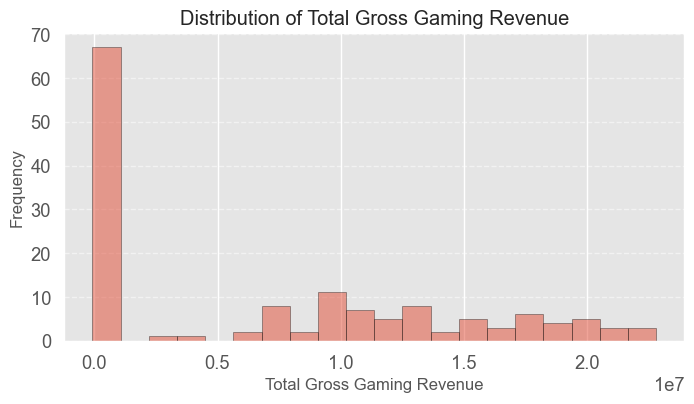

In [200]:
# Plot histogram for Total Gross Gaming Revenue
plt.figure(figsize=(8, 4))
plt.hist(data["Total Gross Gaming Revenue"], bins=20, edgecolor="black", alpha=0.5)
plt.xlabel("Total Gross Gaming Revenue")
plt.ylabel("Frequency")
plt.title("Distribution of Total Gross Gaming Revenue")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

<Figure size 1000x600 with 0 Axes>

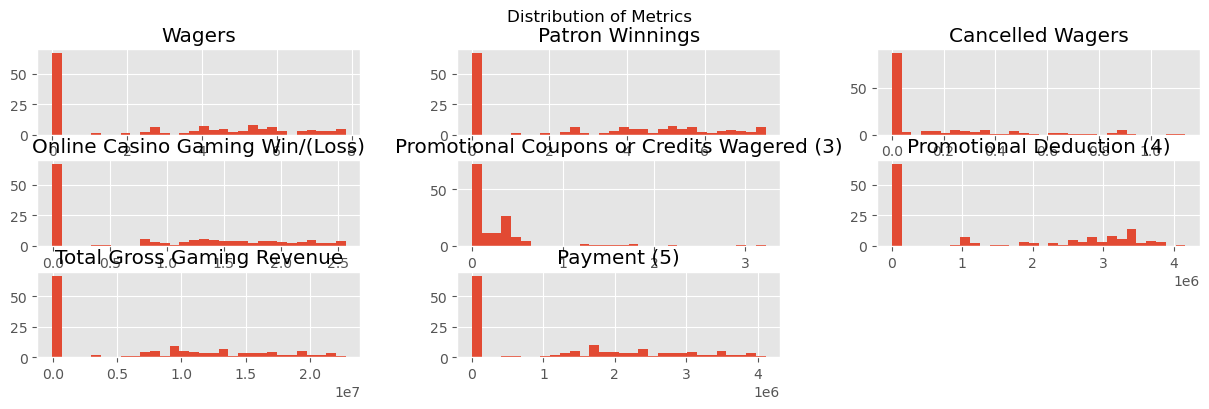

In [67]:
#In the example, the figure is set to 15 inches wide and 4 inches tall.
plt.figure(figsize =(10,6))

data[['Wagers','Patron Winnings','Cancelled Wagers','Online Casino Gaming Win/(Loss)','Promotional Coupons or Credits Wagered (3)',
      'Promotional Deduction (4)','Total Gross Gaming Revenue','Payment (5)']].hist(bins=30, figsize=(15,4))
plt.suptitle('Distribution of Metrics')
plt.show()

Visualizations:  Use line charts to observe revenue trends over time. 

Revenue Trends Across Casinos

<Figure size 1000x400 with 0 Axes>

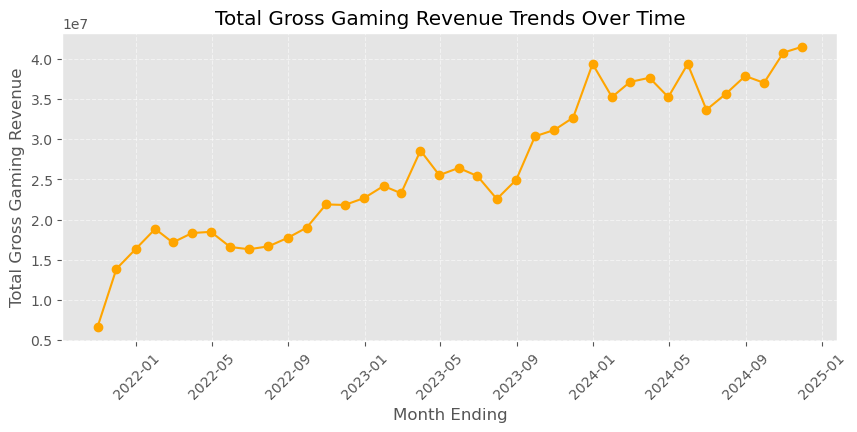

In [69]:
# Convert 'Month Ending' to datetime format for time series analysis
data["Month Ending"] = pd.to_datetime(data["Month Ending"])
# Aggregate total gross gaming revenue by month
revenue_trends = data.groupby("Month Ending")["Total Gross Gaming Revenue"].sum().reset_index()

# Plot the line chart
plt.figure(figsize=(10, 4))
plt.plot(revenue_trends["Month Ending"], revenue_trends["Total Gross Gaming Revenue"], marker="o", linestyle="-", color="orange")
plt.xlabel("Month Ending")
plt.ylabel("Total Gross Gaming Revenue")
plt.title("Total Gross Gaming Revenue Trends Over Time")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

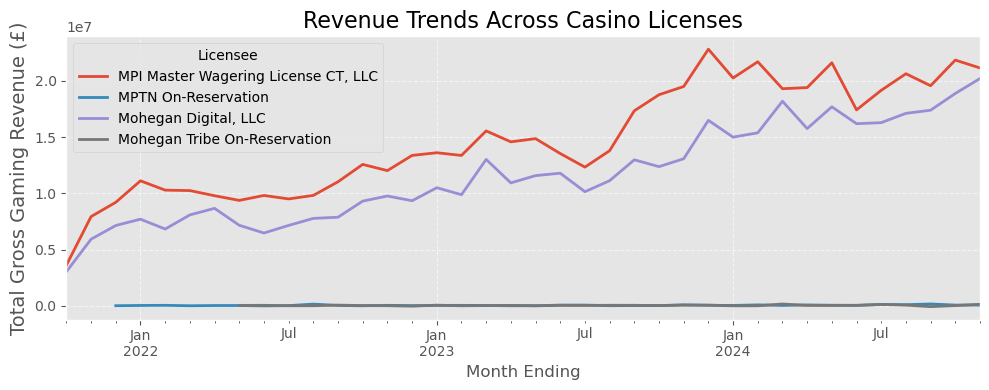

In [47]:
# Convert 'Month Ending' to datetime for accurate plotting
data["Month Ending"] = pd.to_datetime(data["Month Ending"])

# Group by Licensee and Month Ending for revenue analysis
licensees = data.groupby(["Licensee", "Month Ending"])["Total Gross Gaming Revenue"].sum().unstack(level=0)

# Plot the trends
plt.figure(figsize=(10, 4))
licensees.plot(ax=plt.gca(), linewidth=2)
plt.title("Revenue Trends Across Casino Licenses",fontsize=16)
plt.xlabel("Month Ending",fontsize=11)
plt.ylabel("Total Gross Gaming Revenue (£)", fontsize=11)
plt.legend(title="Licensee", loc="upper left")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

1. Revenue Trends Analysis:  
Insight on how the Total gaming revenue changed over time
-Revenue Fluctuation: Casinos experience revenue fluctuations due to market trends. The data over time, identifies increasing and decreasing, which determine the overall direction of casino performance.
2. Impact of Promotions: 
-Spikes in revenue shows marketing efforts which includes promotional deductions and coupons, which may influence revenue trends. 
-Some casinos may show steady growth, while others experience volatility. 

Are there seasonal trends in casino revenue?
Based on the dataset, we can analyze seasonality by observing revenue changes across different months
-Revenue may spike during holiday seasons such as December
-special promotions during these months may drive higher gaming activity.
Expected Insights
The revenue increases with promotional spending, casinos should consider optimizing promotions to maximize impact.

Visualizations:  Create scatter plots to analyze relationships between variables. 

Compare different casino licenses and their revenue trends.
Wagering vs. Patron winnings Trends Scatter Plot Example:

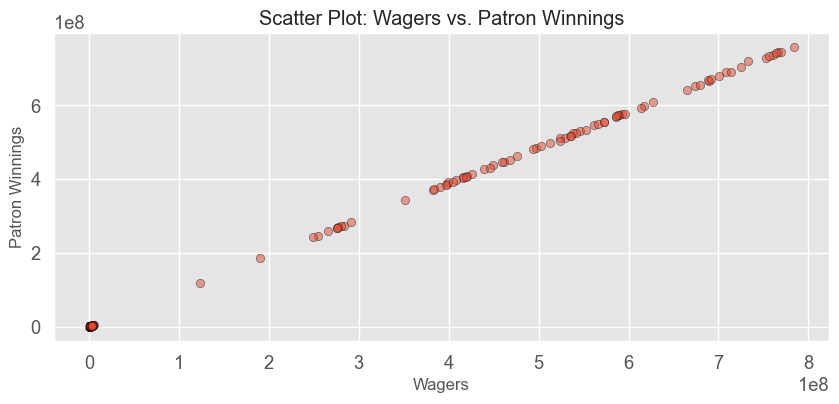

In [234]:
# Extract relevant columns
x = data["Wagers"]
y = data["Patron Winnings"]

# Create the scatter plot
plt.figure(figsize=(10, 4))
plt.scatter(x, y, alpha=0.5, edgecolor='k')
plt.title("Scatter Plot: Wagers vs. Patron Winnings")
plt.xlabel("Wagers")
plt.ylabel("Patron Winnings")
plt.grid(True)
plt.show()

In [ ]:
Key Observations:
If points cluster along a diagonal line, there is a strong correlation between wagers and winnings.

Outliers may indicate high-risk betting behavior or operational inefficiencies.

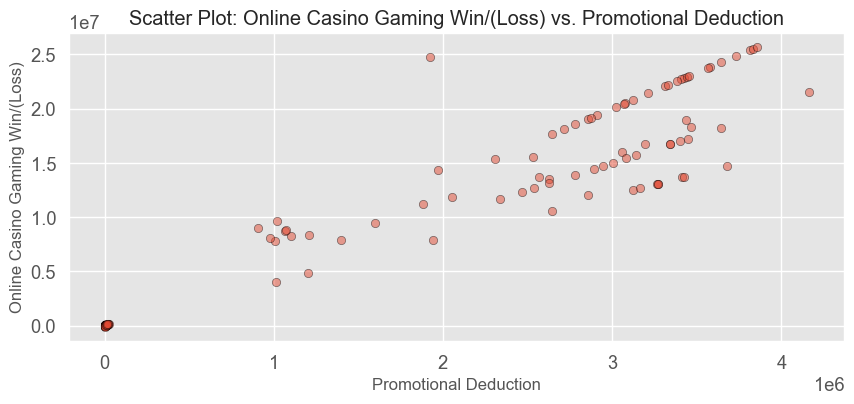

In [236]:
# Extract relevant columns
x = data["Promotional Deduction (4)"]
y = data["Online Casino Gaming Win/(Loss)"]

# Create the scatter plot
plt.figure(figsize=(10, 4))
plt.scatter(x, y, alpha=0.5, edgecolor='k')
plt.title("Scatter Plot: Online Casino Gaming Win/(Loss) vs. Promotional Deduction")
plt.xlabel("Promotional Deduction")
plt.ylabel("Online Casino Gaming Win/(Loss)")
plt.grid(True)
plt.show()

Wagering vs. Payment Trends Scatter Plot Example:

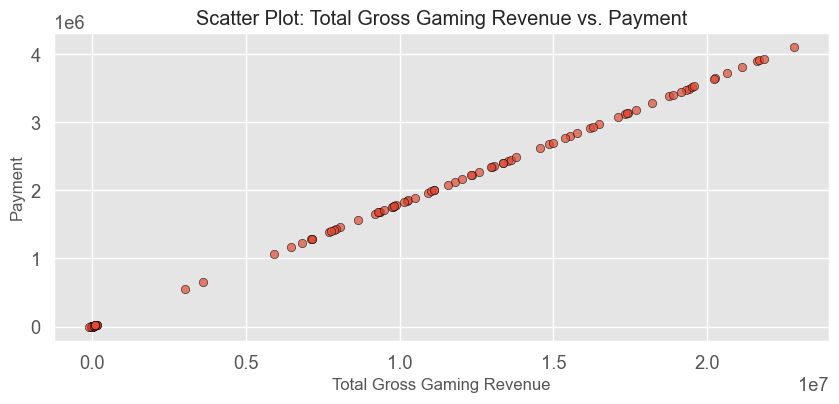

In [238]:
x = data["Total Gross Gaming Revenue"]
y = data["Payment (5)"]

# Create the scatter plot
plt.figure(figsize=(10, 4))
plt.scatter(x, y, alpha=0.7, edgecolor='k')
plt.title("Scatter Plot: Total Gross Gaming Revenue vs. Payment")
plt.xlabel("Total Gross Gaming Revenue")
plt.ylabel("Payment")
plt.grid(True)
plt.show()

the points generally form a diagonal line going upwards, this indicates a positive correlation, 
meaning that higher promotional deductions are associated with higher online casino gaming wins (or smaller losses).
it suggests that as promotional deductions increase, the online casino gaming wins or losses also rise. This could mean that more promotions drive higher engagement or impact gaming outcomes.

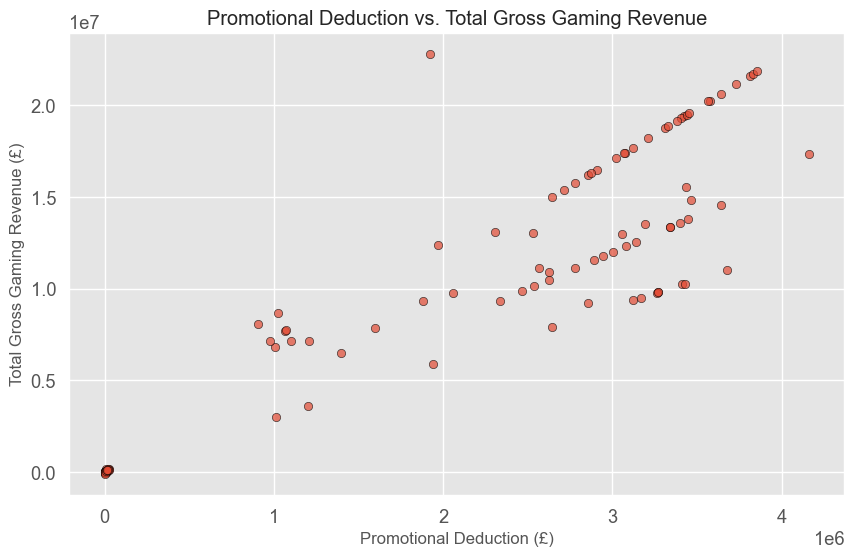

In [244]:
# Scatter plot for Promotional Deduction vs Revenue
plt.figure(figsize=(10, 6))
plt.scatter(data["Promotional Deduction (4)"], data["Total Gross Gaming Revenue"], alpha=0.7, edgecolor='k')
plt.title("Promotional Deduction vs. Total Gross Gaming Revenue")
plt.xlabel("Promotional Deduction (£)")
plt.ylabel("Total Gross Gaming Revenue (£)")
plt.grid(True)
plt.show()

Impact of Promotions:  
Do promotional credits and deductions lead to higher overall revenue?
Expected Insights
The revenue increases with promotional spending, casinos should consider optimizing promotions to maximize impact.
Positive Correlation: The points trend upwards, it suggests that higher revenue correlates with larger payments.

Generate bar charts to compare casino performance. 
To compare casino performance using bar charts, we can analyze key metrics, 
such as Total Gross Gaming Revenue, Wagers, or Payments, for each casino

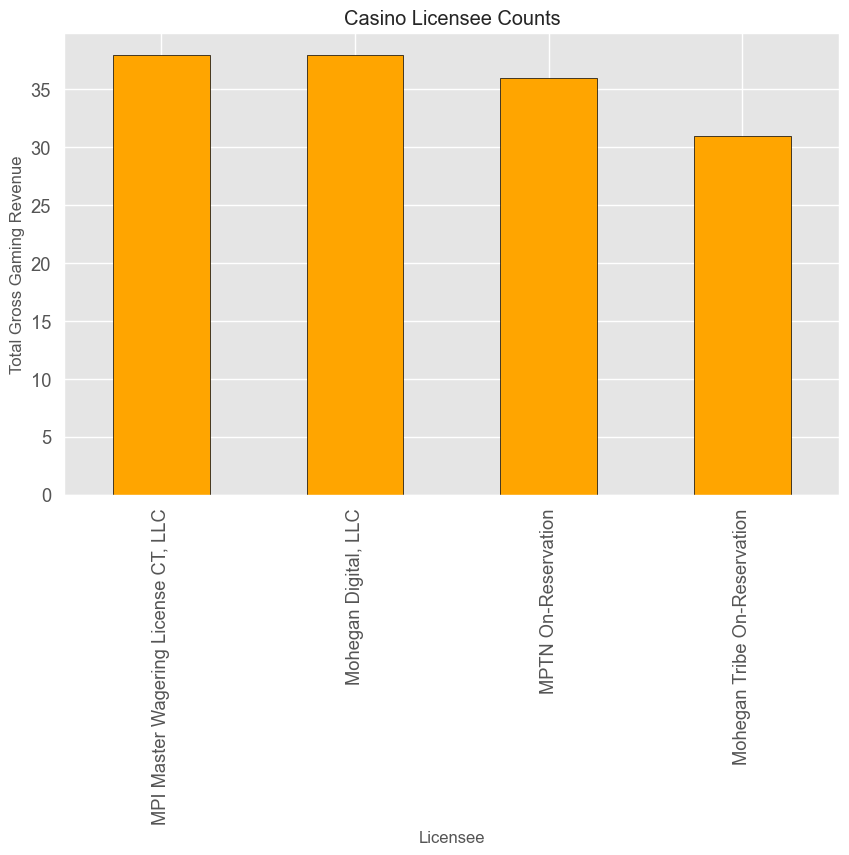

In [298]:
data['Licensee'].value_counts().plot(kind='bar',color="orange", edgecolor="black")
plt.title('Casino Licensee Counts')
plt.xlabel("Licensee")
plt.ylabel("Total Gross Gaming Revenue")
plt.show()

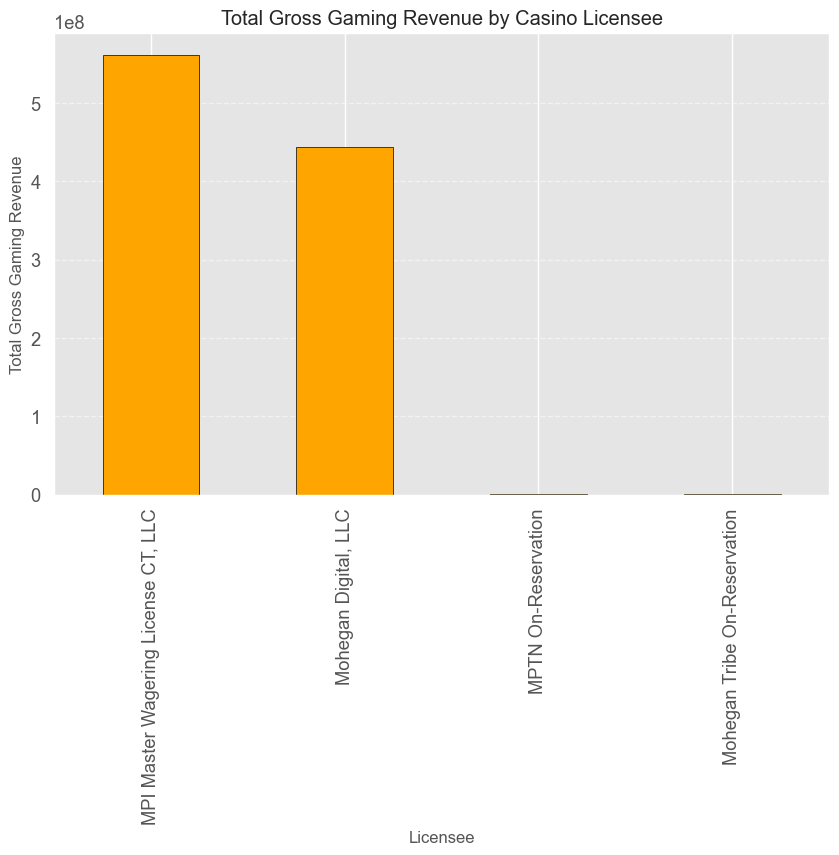

In [300]:
# Aggregate total gross gaming revenue by Licensee (Casino)
performance_data = data.groupby("Licensee")["Total Gross Gaming Revenue"].sum().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
performance_data.plot(kind="bar", color="orange", edgecolor="black")

# Labels and title
plt.xlabel("Licensee")
plt.ylabel("Total Gross Gaming Revenue")
plt.title("Total Gross Gaming Revenue by Casino Licensee")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show the plot
plt.show()

Average Metrics Vs Licensee

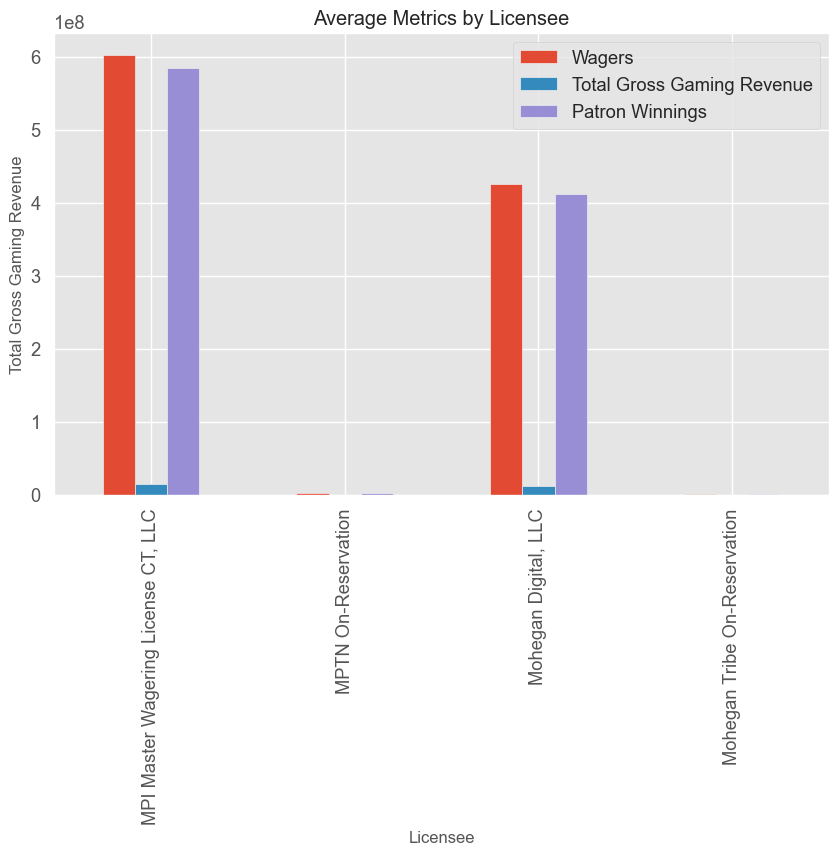

In [294]:
data.groupby('Licensee')[['Wagers', 'Total Gross Gaming Revenue', 'Patron Winnings']].mean().plot(kind='bar',figsize=(10,6))
plt.title('Average Metrics by Licensee')
plt.ylabel("Total Gross Gaming Revenue")
plt.show()

Revenue Growth Over Fiscal Years

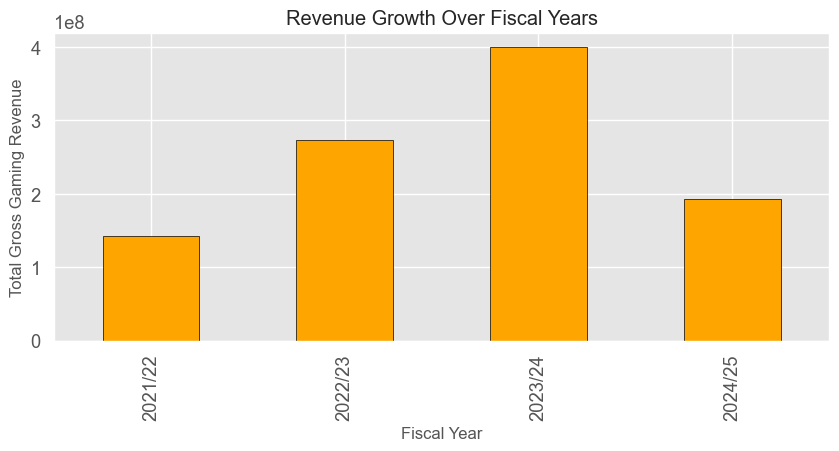

In [292]:
plt.figure(figsize=(10, 4))
revenue_growth = data.groupby('Fiscal Year')['Total Gross Gaming Revenue'].sum()
revenue_growth.plot(kind='bar',color="orange", edgecolor="black")
plt.ylabel("Total Gross Gaming Revenue")
plt.title('Revenue Growth Over Fiscal Years')
plt.show()

Return on Investment (ROI) by Casino Licensee

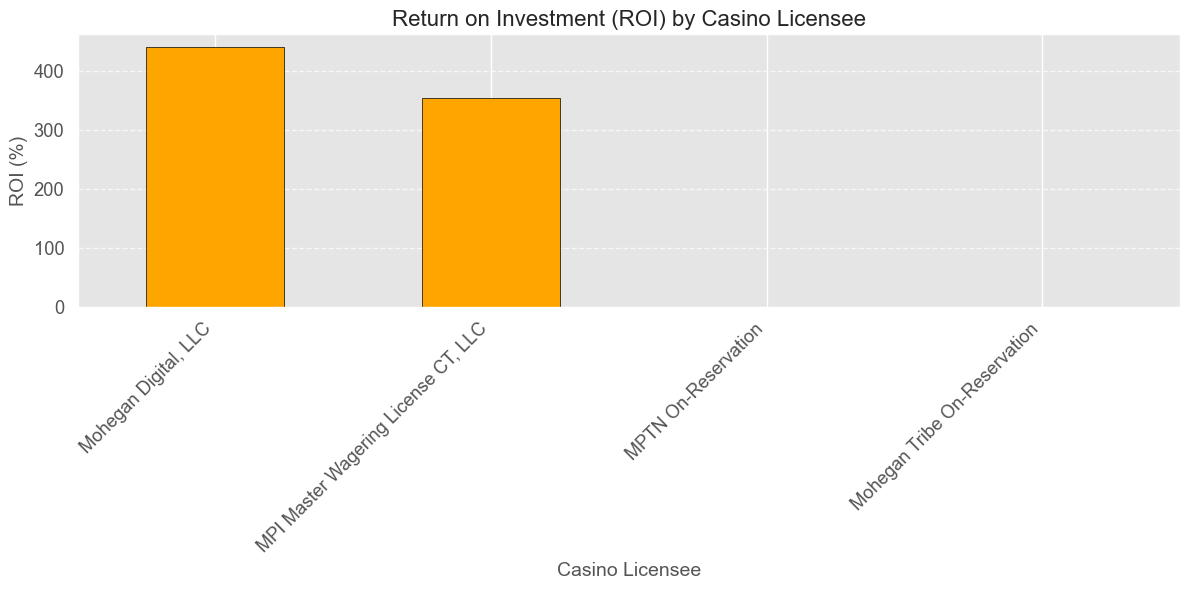

In [308]:
# Compute ROI
data["ROI (%)"] = ((data["Total Gross Gaming Revenue"] - data["Promotional Deduction (4)"]) / data["Promotional Deduction (4)"]) * 100

# Aggregate ROI by licensee
average_roi = data.groupby("Licensee")["ROI (%)"].mean().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
average_roi.plot(kind="bar", color="orange", edgecolor="black")
plt.title("Return on Investment (ROI) by Casino Licensee", fontsize=16)
plt.ylabel("ROI (%)", fontsize=14)
plt.xlabel("Casino Licensee", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [310]:
#compute ROI
data["ROI (%)"] = ((data["Total Gross Gaming Revenue"] - data["Promotional Deduction (4)"]) / data["Promotional Deduction (4)"]) * 100

# Average ROI per casino
average_roi = data.groupby("Licensee")["ROI (%)"].mean().sort_values(ascending=False)

# Display results
print("Average ROI by Casino Licensee:")
print(average_roi)

Average ROI by Casino Licensee:
Licensee
Mohegan Digital, LLC                   439.819245
MPI Master Wagering License CT, LLC    353.395413
MPTN On-Reservation                          -inf
Mohegan Tribe On-Reservation                 -inf
Name: ROI (%), dtype: float64


Bar chart displays this revenue comparison, giving a clear visual of how each casino performs.
Total Gross Gaming Revenue (to rank casino performance in terms of overall revenue)

Insights from the Visualization:
Casinos with high ROI effectively convert promotional spending into revenue.
Lower ROI may indicate inefficiencies in promotional strategies.
Comparing licensees helps identify best practices and areas for optimization.
Revenue peaked in 2023/24
Casinos like MPI Master Wagering License CT, LLC consistently generate high revenue.
Smaller licensees show more fluctuation, suggesting operational or market challenges

Correlation & Insights: Compute correlation matrices to identify strong relationships between variables.

Correlation matrices are an excellent tool to identify strong relationships between variables
A heatmap is used to visualize the strength and direction (positive or negative) of the relationships.
Using a correlation matrix, we can evaluate the relationship between two variables:

If the relationship is 1, then the relationship is positively strong.
If the relationship is 0, then it means the relationship is weak or nonexistent.

Higher promotional spending leads to increased revenue, 
To analyze the correlation between Promotional Deduction and Total Gross Gaming Revenue

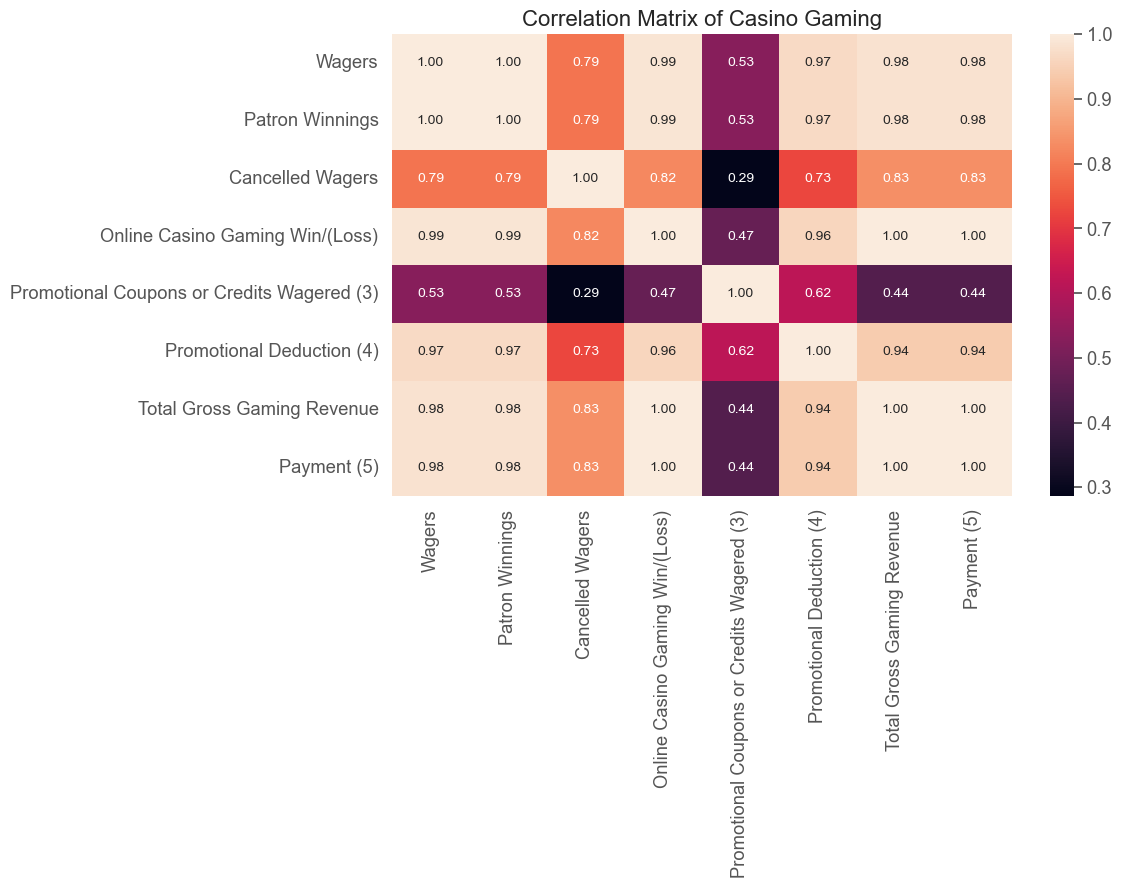

In [272]:
# Select relevant numerical columns for correlation analysis
num= [
    "Wagers",
    "Patron Winnings",
    "Cancelled Wagers",
    "Online Casino Gaming Win/(Loss)",
    "Promotional Coupons or Credits Wagered (3)",
    "Promotional Deduction (4)",
    "Total Gross Gaming Revenue",
    "Payment (5)"
]

#correlation
corr = data[num].corr()

#plt.figure(dpi=130)
plt,figure(figsize=(10,6))
sns.heatmap(data[num].corr(), annot=True, fmt= '.2f')
plt.title("Correlation Matrix of Casino Gaming",fontsize=16)
plt.show()

In [139]:
corr["Total Gross Gaming Revenue"].sort_values(ascending = False)


Total Gross Gaming Revenue                    1.000000
Payment (5)                                   0.999999
Online Casino Gaming Win/(Loss)               0.998350
Wagers                                        0.982202
Patron Winnings                               0.981223
Promotional Deduction (4)                     0.940936
Cancelled Wagers                              0.832672
Promotional Coupons or Credits Wagered (3)    0.440832
Name: Total Gross Gaming Revenue, dtype: float64

In [79]:
# Extract relevant columns
x = data["Promotional Deduction (4)"]
y = data["Total Gross Gaming Revenue"]

# Compute correlation
correlation = x.corr(y)

# Display the result
print(f"Correlation between Promotional Deduction and Total Gross Gaming Revenue: {correlation}")

Correlation between Promotional Deduction and Total Gross Gaming Revenue: 0.9409363827723426


Impact of Promotions:   Is there a correlation between promotional spending and net winnings? 
Based on the dataset, the relationship between Promotional Coupons or Credits Wagered and Promotional Deduction with Total Gross Gaming Revenue.
Findings:
Its shows correlation is positive, higher promotional spending leads to increased revenue.

In [75]:
# Compute correlations
correlation_coupons_revenue = data["Promotional Coupons or Credits Wagered (3)"].corr(data["Total Gross Gaming Revenue"])
correlation_deduction_revenue = data["Promotional Deduction (4)"].corr(data["Total Gross Gaming Revenue"])

# Display results
print(f"Correlation between Promotional Coupons or Credits and Revenue: {correlation_coupons_revenue}")
print(f"Correlation between Promotional Deduction and Revenue: {correlation_deduction_revenue}")

Correlation between Promotional Coupons or Credits and Revenue: 0.4408315903617269
Correlation between Promotional Deduction and Revenue: 0.9409363827723426


Strong Positive Correlation (close to 1.0) →0.94 Suggests that higher promotional spending is linked to increased revenue.

Correlation between Promotional Deduction and Total Gross Gaming Revenue: 0.9409363827723426
Positive Correlation (close to 1): Indicates that higher promotional spending is associated with increased revenue.

Impact of Promotions:  
Do promotional credits and deductions lead to higher overall revenue?


In [ ]:
Impact of Promotional Spending on Revenue
Correlation Analysis
We analyze how promotional activities influence revenue:

In [79]:
# Identify the casino licenses generating the highest total revenue

# Aggregate total revenue by casino license
casino_revenue_ranked = data.groupby("Licensee")["Total Gross Gaming Revenue"].sum().sort_values(ascending=False)

# Display the top-performing casinos
casino_revenue_ranked

Licensee
MPI Master Wagering License CT, LLC    561714816
Mohegan Digital, LLC                   444084162
MPTN On-Reservation                      1424731
Mohegan Tribe On-Reservation              947694
Name: Total Gross Gaming Revenue, dtype: int64

Identifying Underperforming Casinos
Analysis Method:

In [81]:
# Compute average revenue per licensee
average_revenue = data.groupby("Licensee")["Total Gross Gaming Revenue"].mean().sort_values()

# Display underperforming casinos (lowest revenue)
print("Casinos with Lowest Average Revenue:")
print(average_revenue.head(5))

Casinos with Lowest Average Revenue:
Licensee
Mohegan Tribe On-Reservation           3.057077e+04
MPTN On-Reservation                    3.957586e+04
Mohegan Digital, LLC                   1.168643e+07
MPI Master Wagering License CT, LLC    1.478197e+07
Name: Total Gross Gaming Revenue, dtype: float64


Insights:
Some casinos generate consistently lower revenue, possibly due to weak patron engagement or operational issues.

These operators may require marketing boost.

averaging revenue over multiple months, we can spot casinos generating lower-than-average revenue. Mohegan Digital, LLC  1.168643e+07

In [85]:
# Compute correlation
correlation_cancelled_revenue = data["Cancelled Wagers"].corr(data["Total Gross Gaming Revenue"])

# Display result
print(f"Correlation between Cancelled Wagers and Total Gross Gaming Revenue: {correlation_cancelled_revenue}")

Correlation between Cancelled Wagers and Total Gross Gaming Revenue: 0.8326717729629032


The number of Cancelled Wagers varies across months and licensees.
High-performing licensees ( MPI Master Wagering License CT, LLC) show consistently higher cancellations compared to smaller operators.
cancelled wagers appear to have a bigger impact, reducing revenue stability.
Most casinos report relatively low numbers of cancelled wagers.

In [87]:
# Compute payout percentage
data["Payout Percentage"] = (data["Patron Winnings"] / data["Wagers"]) * 100

# Calculate average payout percentage per casino
average_payout = data.groupby("Licensee")["Payout Percentage"].mean().sort_values(ascending=False)

# Display results
print("Average Payout Percentage by Casino Licensee:")
print(average_payout)

Average Payout Percentage by Casino Licensee:
Licensee
MPTN On-Reservation                    97.266830
Mohegan Tribe On-Reservation           97.168718
MPI Master Wagering License CT, LLC    96.976052
Mohegan Digital, LLC                   96.719924
Name: Payout Percentage, dtype: float64


Relationship Between Variables:

Online Casino Gaming Win/(Loss) vs. Promotional Deduction: Patterns in the scatter plot may suggest that higher promotional deductions could either enhance win/loss outcomes or show minimal correlation depending on operational strategies.

Total Gross Gaming Revenue vs. Payment: A scatter plot highlights how revenue influences payments, revealing proportional relationships or deviations from expected trends.

Casino Comparisons:

Bar charts of total revenue across different licensees highlight performance disparities. Some operators like "MPI Master Wagering License CT, LLC" consistently dominate in terms of revenue, while smaller licensees show more variability.

Revenue Trends:

Line plots tracking revenue over time show steady growth for leading operators and seasonal or fluctuating trends for others. This could indicate strategic operational changes or external market factors.

Promotional Spending Impact:

Correlation analysis between promotional spending and revenue can validate that higher spending drives revenue growth. Strong positive correlations highlight effective promotional strategies.

Overall Data Relationships:

The correlation matrix uncovers hidden relationships between variables. For example, strong correlations between Wagers and Total Gross Gaming Revenue emphasize their pivotal role in overall financial performance.


Optimize Revenue Collection Processes
Insights: Casinos with steady growth in Total Gross Gaming Revenue (like “MPI Master Wagering License CT, LLC”) exhibit efficient collection and high wagering activity.

The predictive analytics to anticipate gaming patterns.

shows to Invest in Data Analytics
Insights: Trends and correlations derived from the data highlight the importance of data-driven decision-making.


To determine whether casinos should increase or decrease promotional spending, we need to analyze the relationship between Promotional Deduction and Total Gross Gaming Revenue from the dataset.

Observations From the File:
There is some variability in how promotional deductions impact revenue:

High-performing licensees, such as "MPI Master Wagering License CT, LLC," show consistent revenue growth despite fluctuations in promotional spending.

Smaller licensees like "Mohegan Tribe On-Reservation" demonstrate less correlation between higher promotional deductions and revenue increases.

Correlation Analysis:

For larger operations, promotional spending appears to drive engagement and boost revenue, indicating its effectiveness.

For smaller casinos with inconsistent revenue performance, the impact of promotional spending is less clear, suggesting the need for more targeted strategies.

Recommendation:
Increase promotional spending cautiously and strategically.

For Larger Casinos: Invest more in promotions but ensure they are data-driven. Tailor campaigns to high-value patrons and use analytics to measure their ROI.

For Smaller Casinos: Review the effectiveness of current promotions. Focus on cost-effective strategies and personalization to maximize impact while maintaining efficient spending.

1. Volatility in Patron Winnings
Observation: Fluctuations in Patron Winnings can directly impact revenue stability, especially if winnings frequently exceed wagers (as seen in some months for smaller licensees).

Risk: Unexpectedly high winnings can reduce overall revenue during specific periods.

Mitigation: Implement caps on payouts or develop predictive models to anticipate high-winning streaks.

2. Ineffective Promotional Spending
Observation: While promotional spending has the potential to drive revenue, its effectiveness is inconsistent across licensees. For example, some licensees exhibit minimal returns on high promotional deductions.

Risk: Overspending on ineffective promotions could erode profits.
Mitigation: Continuously analyze ROI for promotions and focus on targeted, data-driven campaigns that maximize impact.